In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import interpolation as inter

In [2]:
def correct_skew(image, delta=1, limit=5):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
              borderMode=cv2.BORDER_REPLICATE)

    return best_angle, rotated

In [3]:
#reading the original image using OpenCV
image = cv2.imread('Original.jpg')

In [4]:
#Converting the colored image to greyscale
angle, rotated = correct_skew(image)
print(angle)
cv2.imwrite('rotated.jpg', rotated)
gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

-1


In [5]:
# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(rotated, [c], -1, (255,255,255), 5)

In [6]:
# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(rotated, [c], -1, (255,255,255), 5)

In [7]:
gray = cv2.cvtColor(rotated,cv2.COLOR_BGR2GRAY)

In [8]:
#applying median filter for Salt and pepper/impulse noise
filter1 = cv2.medianBlur(gray,5)

In [9]:
#applying gaussian blur to smoothen out the image edges
filter2 = cv2.GaussianBlur(filter1,(5,5),0)

In [10]:
#applying non-localized means for final Denoising of the image
dst = cv2.fastNlMeansDenoising(filter2,None,17,9,17)

In [11]:
#converting the image to binarized form using adaptive thresholding
th1 = cv2.adaptiveThreshold(dst,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

In [12]:
cv2.imwrite('ImagePreProcessingFinal.jpg', th1)

True

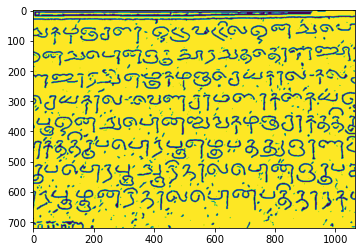

In [13]:
plt.imshow(th1)

In [14]:
import cv2
import os
import numpy as np
import imutils
import matplotlib.pyplot as plt

In [15]:
pip install imutils

In [16]:
image = cv2.imread("ImagePreProcessingFinal.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [17]:
ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

In [18]:
dilate = cv2.dilate(thresh1, None, iterations=2)

In [19]:
cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[1] if imutils.is_cv2() else cnts[0]

In [20]:
sorted_ctrs = sorted(cnts, key=lambda ctr: cv2.boundingRect(ctr)[0] + cv2.boundingRect(ctr)[1] * image.shape[1] )

In [21]:
orig = image.copy()
i = 0
fig =plt.figure(figsize = (10,10))

directory = r'C:\Users\Siddhartha Devan V\jupyter ml\sarana project\sarana_test_images'

print(os.chdir(directory))
print(os.getcwd())
for cnt in sorted_ctrs:
#     print(cv2.contourArea(cnt))
    # Check the area of contour, if it is very small ignore it
    if(cv2.contourArea(cnt) < 200):
        continue
    
    # Filtered countours are detected
    x,y,w,h = cv2.boundingRect(cnt)
    
    # Taking ROI of the cotour
    roi = image[y:y+h, x:x+w]
    
    # Mark them on the image if you want
    cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
    
    # Save your contours or characters
    print(cv2.imwrite(r"C:\Users\Siddhartha Devan V\jupyter ml\sarana project\sarana_test_images" + str(i) + ".png", roi))
    
    
    i = i + 1 

None
C:\Users\Siddhartha Devan V\jupyter ml\sarana project\sarana_test_images
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


<Figure size 720x720 with 0 Axes>

In [22]:
cv2.imwrite("box.jpg",orig)

True

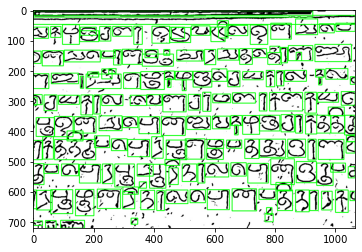

In [23]:
plt.imshow(orig)

In [24]:
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.cluster import KMeans
import os, shutil, glob, os.path
from PIL import Image as pil_image
image.LOAD_TRUNCATED_IMAGES = True

In [25]:
model = VGG16(weights='imagenet', include_top=False)

In [28]:
imdir = r'C:\Users\Siddhartha Devan V\jupyter ml\sarana project\sarana_test_images'
os.chdir(imdir)
targetdir = r'C:\Users\Siddhartha Devan V\jupyter ml\sarana project\images_categorised'
number_clusters = 28

In [29]:
# Loop over files and get features
filelist = glob.glob(os.path.join(imdir, '*.PNG'))
filelist.sort()
featurelist = []
labels = []
print(filelist)

['C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images0.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images1.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images10.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images100.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images101.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images102.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images103.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images104.png', 'C:\\Users\\Siddhartha Devan V\\jupyter ml\\sarana project\\sarana_test_images\\sarana_test_images105.png', 'C:\\Users\\Siddhartha Devan V\\

In [30]:
for i, imagepath in enumerate(filelist):
    print("Status: %s / %s" %(i+1, len(filelist)), end="\r")
    img = image.load_img(imagepath, target_size=(224, 224))
    imagepath = imagepath.replace("\\", "/")
    print(imagepath)    
    start = (imagepath[51:]).index("/")
    end = (imagepath[51+1+start:]).index("/")
    labels.append(imagepath[52+start:52+start+end])  
    
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = np.array(model.predict(img_data))
    featurelist.append(features.flatten())

print("Labels - ", labels)

C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images0.png
1/1 [==============================] - 0s 437ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images1.png
1/1 [==============================] - 0s 139ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images10.png
1/1 [==============================] - 0s 136ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images100.png
1/1 [==============================] - 0s 186ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images101.png
1/1 [==============================] - 0s 137ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images102.png
1/1 [==============================] - 0s 136ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images10

C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images147.png
1/1 [==============================] - 0s 120ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images148.png
1/1 [==============================] - 0s 106ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images149.png
1/1 [==============================] - 0s 102ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images15.png
1/1 [==============================] - 0s 104ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images150.png
1/1 [==============================] - 0s 109ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images151.png
1/1 [==============================] - 0s 181ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_imag

1/1 [==============================] - 0s 106ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images40.png
1/1 [==============================] - 0s 174ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images41.png
1/1 [==============================] - 0s 120ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images42.png
1/1 [==============================] - 0s 109ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images43.png
1/1 [==============================] - 0s 110ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images44.png
1/1 [==============================] - 0s 112ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images45.png
1/1 [==============================] - 0s 166ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sa

1/1 [==============================] - 0s 144ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images9.png
1/1 [==============================] - 0s 120ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images90.png
1/1 [==============================] - 0s 108ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images91.png
1/1 [==============================] - 0s 116ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images92.png
1/1 [==============================] - 0s 108ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images93.png
1/1 [==============================] - 0s 145ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sarana project/sarana_test_images/sarana_test_images94.png
1/1 [==============================] - 0s 122ms/step
C:/Users/Siddhartha Devan V/jupyter ml/sar

In [31]:
# Clustering
kmeans = KMeans(n_clusters=number_clusters, random_state=0).fit(np.array(featurelist))

In [32]:
try:
    os.makedirs(targetdir)
except OSError:
    pass

In [33]:
print("\n")
for i, m in enumerate(kmeans.labels_):
    try:
        os.makedirs(targetdir+'\\'+str(m))
        #print(m)
    except OSError:
        pass
    print("Copy: %s / %s" %(i+1, len(kmeans.labels_)), end="\r")
    shutil.copy(filelist[i], targetdir +'/'+ str(m) + "/" + str(i) + ".jpg")